In [3]:
#导入需要的库
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()  
import matplotlib.pyplot as plt

#配置jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

#导入数据
titanic_df  = pd.read_csv("./data/train.csv")

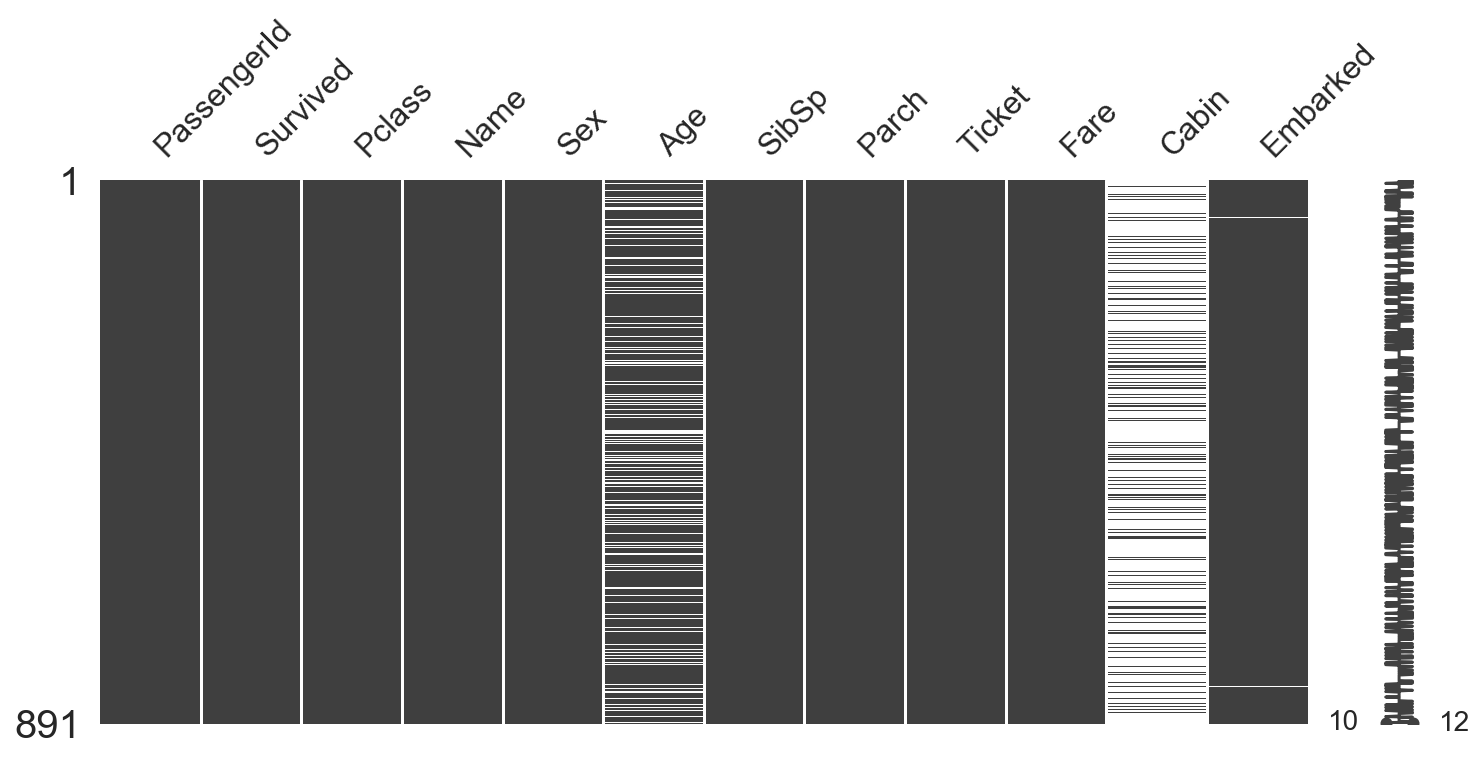

In [4]:
import missingno as msno
msno.matrix(titanic_df,figsize=(12,5))

## 清洗数据

In [10]:
age_median = titanic_df.Age.median()# 计算所有人年龄的中位数

age_median

28.0

In [11]:
titanic_df.Age.fillna(age_median, inplace=True)# 使用fillna填充缺失值，inplace=True表示在原数据titanic_df上直接进行修改

titanic_df.Age.describe()# 查看Age列的描述性统计值


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## 分析数据

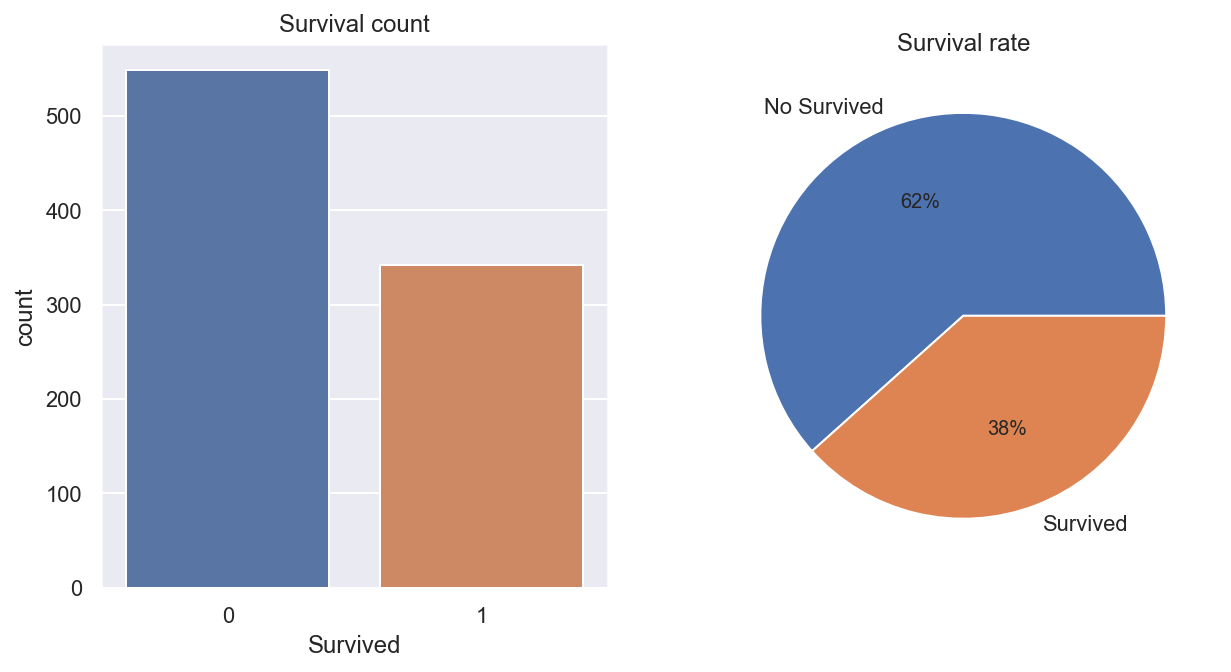

In [84]:
total_survived= titanic_df['Survived'].sum()
total_no_survived = 891 - total_survived

plt.figure(figsize = (10,5))#创建画布
plt.subplot(121)#添加第1个子图
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival count')

plt.subplot(122)#添加第2个子图
plt.pie([total_no_survived, total_survived],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

In [85]:
titanic_df.pivot_table(values="Survived",index="Sex",aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


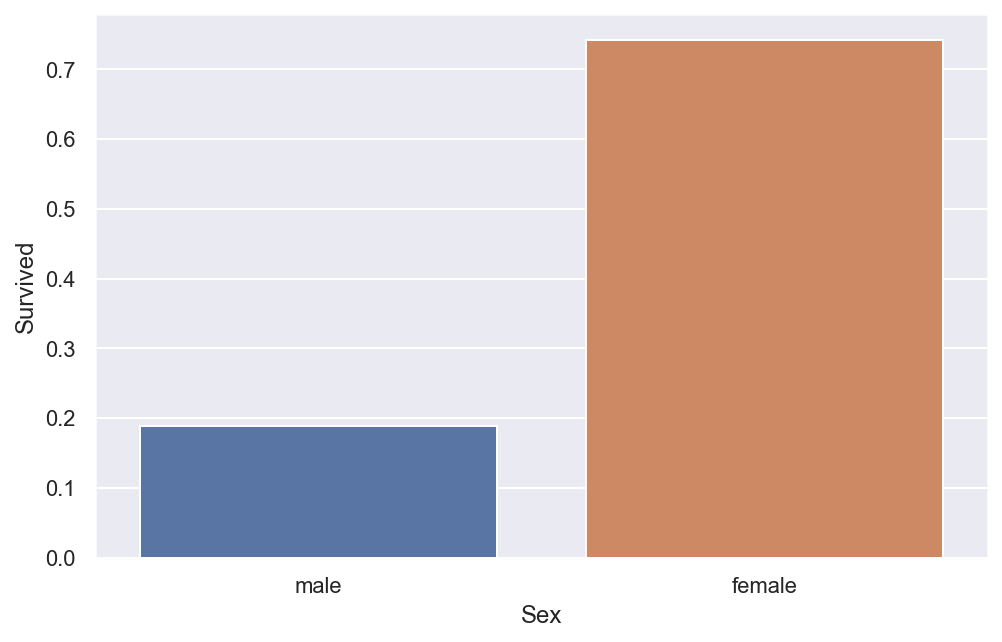

In [87]:
plt.figure(figsize= (8 ,5))#创建画布
sns.barplot(data=titanic_df,x="Sex",y="Survived",ci=None)

plt.show()

In [89]:
titanic_df.pivot_table(values="Survived",index=["Pclass","Sex"],aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

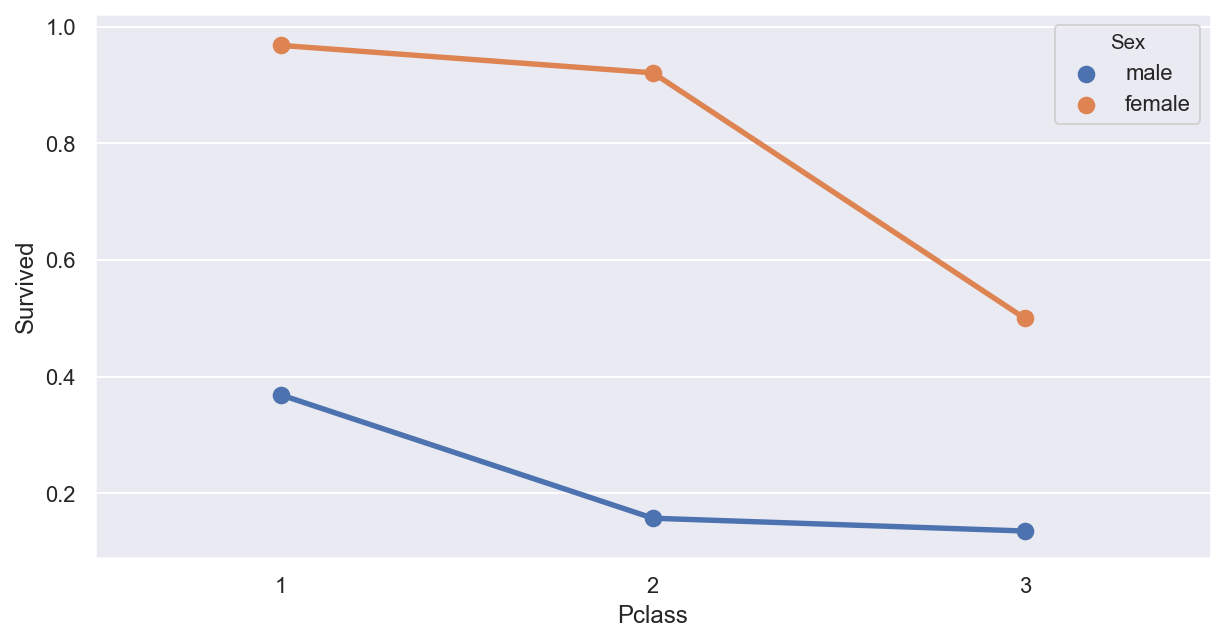

In [91]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=titanic_df,x="Pclass",y="Survived",hue="Sex",ci=None)
plt.show()

In [93]:
titanic_df["AgeGroup"]=pd.cut(titanic_df["Age"],5)#将年龄列的数值划分为5等分
titanic_df.AgeGroup.value_counts(sort=False)#查看每个分组有多少人数

(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

In [94]:
titanic_df.pivot_table(values="Survived",index="AgeGroup",aggfunc=np.mean)

,Survived
AgeGroup,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


# 预测

In [79]:
titanic_df_test  = pd.read_csv("./data/test.csv")
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
titanic_df_test['Survived']=titanic_df_test.apply(lambda row: 1 if row['Sex'] =='female' else 0,axis=1)

titanic_df_test.loc[:,['PassengerId','Survived']].to_csv('./data/re.csv',index=False)